In [2]:
%store -r setup_instance_check_passed

In [3]:
try:
    setup_instance_check_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++")

In [4]:
print(setup_instance_check_passed)

True


In [5]:
%store -r setup_dependencies_passed

In [6]:
try:
    setup_dependencies_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++")

In [7]:
print(setup_dependencies_passed)

True


In [8]:
%store -r setup_s3_bucket_passed

In [9]:
try:
    setup_s3_bucket_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++")

In [10]:
print(setup_s3_bucket_passed)

True


In [11]:
%store -r setup_iam_roles_passed

In [12]:
try:
    setup_iam_roles_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++")

In [13]:
print(setup_iam_roles_passed)

True


In [14]:
if not setup_instance_check_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_dependencies_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_s3_bucket_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_iam_roles_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

IMPORT LIBRARIES

In [15]:
import boto3
import sagemaker
import pandas as pd
import seaborn as sns
!pip install --disable-pip-version-check -q PyAthena==2.1.0
from pyathena import connect
import matplotlib.pyplot as plt

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
#s3_client = boto3.client('s3', region_name='us-east-1')
#bucket_name = 'team1ads508finalproject'

In [6]:
sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account")

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

public = "s3://team1ads508finalproject"

private = "s3://ADS508_project".format(bucket)

!aws s3 cp --recursive $s3_public/ $s3_private/

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
fatal error: An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Access Denied


CREATE THE BUCKET

In [7]:
import boto3
import sagemaker

session = boto3.session.Session()
region = session.region_name
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()

s3 = boto3.Session().client(service_name="s3", region_name=region)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [8]:
setup_s3_bucket_passed = False

In [9]:
print("Default bucket: {}".format(bucket))

Default bucket: sagemaker-us-east-1-339713065136


READ CSV

In [16]:
# read in main applications df
applications = pd.read_csv('s3://sagemaker-us-east-1-339713065136/team-project/application_train.csv')
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(applications.shape) # 307,511 records, 122 fields


(307511, 122)


In [18]:
applications['SK_ID_CURR'].nunique() # all Ids are unique


307511

In [19]:
# read in 2nd bureau df
bureau = pd.read_csv('s3://sagemaker-us-east-1-339713065136/team-project/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [20]:
print(bureau.shape) # 1,716,428 records, 17 fields


(1716428, 17)


In [21]:
bureau['SK_ID_CURR'].nunique() # less IDs than total records, so there are many records per single ID

305811

In [22]:
# read in 3rd previous df
previous = pd.read_csv('s3://sagemaker-us-east-1-339713065136/team-project/previous_application.csv')
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print(previous.shape) # 1,670,214 records, 37 fields

(1670214, 37)


In [24]:
previous['SK_ID_CURR'].nunique() # less IDs than total records, so there are many records per single ID

338857

aggregate the bureau df

In [25]:
# group by SK_ID_CURR and calculate sum for each of the 4 fields, reset index to 0
bureau_agg = bureau.groupby('SK_ID_CURR').agg(
    bureau_AMT_CREDIT_SUM=('AMT_CREDIT_SUM', 'sum'),
    bureau_AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', 'sum'),
    bureau_AMT_CREDIT_SUM_LIMIT=('AMT_CREDIT_SUM_LIMIT', 'sum'),
    bureau_AMT_CREDIT_SUM_OVERDUE=('AMT_CREDIT_SUM_OVERDUE', 'sum')
).reset_index()

# rename the id fields
bureau_agg.rename(columns={'SK_ID_CURR': 'bureau_SK_ID_CURR'}, inplace=True)

bureau_agg.head()

,bureau_SK_ID_CURR,bureau_AMT_CREDIT_SUM,bureau_AMT_CREDIT_SUM_DEBT,bureau_AMT_CREDIT_SUM_LIMIT,bureau_AMT_CREDIT_SUM_OVERDUE
0,100001,1453365.000,596686.5,0.000,0.0
1,100002,865055.565,245781.0,31988.565,0.0
2,100003,1017400.500,0.0,810000.000,0.0
3,100004,189037.800,0.0,0.000,0.0
4,100005,657126.000,568408.5,0.000,0.0


In [26]:
bureau_agg.count()

bureau_SK_ID_CURR                305811
bureau_AMT_CREDIT_SUM            305811
bureau_AMT_CREDIT_SUM_DEBT       305811
bureau_AMT_CREDIT_SUM_LIMIT      305811
bureau_AMT_CREDIT_SUM_OVERDUE    305811
dtype: int64

In [27]:
bureau_agg['bureau_SK_ID_CURR'].nunique() # all ids are unique now

305811

aggregate the previous df

In [28]:
# group by SK_ID_CURR and calculate sum for each of the 4 fields, reset index to 0
previous_agg = previous.groupby('SK_ID_CURR').agg(
    previous_AMT_ANNUITY=('AMT_ANNUITY', 'sum'),
    previous_AMT_APPLICATION=('AMT_APPLICATION', 'sum'),
    previous_AMT_CREDIT=('AMT_CREDIT', 'sum'),
    previous_AMT_GOODS_PRICE=('AMT_GOODS_PRICE', 'sum')
).reset_index()

# rename the id fields
previous_agg.rename(columns={'SK_ID_CURR': 'prevoius_SK_ID_CURR'}, inplace=True)

previous_agg.head()

,prevoius_SK_ID_CURR,previous_AMT_ANNUITY,previous_AMT_APPLICATION,previous_AMT_CREDIT,previous_AMT_GOODS_PRICE
0,100001,3951.000,24835.5,23787.0,24835.5
1,100002,9251.775,179055.0,179055.0,179055.0
2,100003,169661.970,1306309.5,1452573.0,1306309.5
3,100004,5357.250,24282.0,20106.0,24282.0
4,100005,4813.200,44617.5,40153.5,44617.5


In [29]:
previous_agg.count()

prevoius_SK_ID_CURR         338857
previous_AMT_ANNUITY        338857
previous_AMT_APPLICATION    338857
previous_AMT_CREDIT         338857
previous_AMT_GOODS_PRICE    338857
dtype: int64

In [30]:
previous_agg['prevoius_SK_ID_CURR'].nunique() # all ids are unique now

338857

select fields in the main application df

In [31]:
# select specific fields
applications_select = applications[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                   'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                   'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                                   'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']]

applications_select.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-9461,-637,-3648.0,1,1,0,1,1,0,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-16765,-1188,-1186.0,1,1,0,1,1,0,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-19046,-225,-4260.0,1,1,1,1,1,0,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-19005,-3039,-9833.0,1,1,0,1,0,0,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-19932,-3038,-4311.0,1,1,0,1,0,0,Core staff


In [32]:
print(applications_select.shape) # 307,511 records, and only 27 fields now

(307511, 27)


join the 3 df's together on ID

In [33]:
# left join applications_select with previous_agg on SK_ID_CURR
merged = applications_select.merge(previous_agg, left_on='SK_ID_CURR', right_on='prevoius_SK_ID_CURR', how='left')

# left join the result with bureau_agg on bureau_SK_ID_CURR
merged = merged.merge(bureau_agg, left_on='SK_ID_CURR', right_on='bureau_SK_ID_CURR', how='left')

merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,prevoius_SK_ID_CURR,previous_AMT_ANNUITY,previous_AMT_APPLICATION,previous_AMT_CREDIT,previous_AMT_GOODS_PRICE,bureau_SK_ID_CURR,bureau_AMT_CREDIT_SUM,bureau_AMT_CREDIT_SUM_DEBT,bureau_AMT_CREDIT_SUM_LIMIT,bureau_AMT_CREDIT_SUM_OVERDUE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,100002.0,9251.775,179055.00,179055.0,179055.00,100002.0,865055.565,245781.0,31988.565,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,100003.0,169661.970,1306309.50,1452573.0,1306309.50,100003.0,1017400.500,0.0,810000.000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,100004.0,5357.250,24282.00,20106.0,24282.00,100004.0,189037.800,0.0,0.000,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,100006.0,141907.050,2449829.34,2625259.5,2449829.34,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,100007.0,73672.830,903181.50,999832.5,903181.50,100007.0,146250.000,0.0,0.000,0.0


In [34]:
print(merged.shape) # 307,511 records, and only 27 fields now

# now we have fields from all 3 tables, joined based on ID and no duplicates

(307511, 37)


data quality check

In [35]:
# check if there are any fields that are all null
all_null_columns = merged.columns[merged.isnull().all()].tolist()
all_null_columns

[]

In [36]:
# check if there are any fields that have just 1 unique value
single_value_columns = [column for column in merged.columns if merged[column].nunique(dropna=False) == 1]
single_value_columns

[]

set features and target field

In [37]:
# set target field a y
y = merged.TARGET
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [38]:
# check distribution
y.value_counts() # about 8.78% default on their loan

0    282686
1     24825
Name: TARGET, dtype: int64

In [39]:
# drop the the id fields (no useful info here), and the label field from features and call it x
list = ['SK_ID_CURR','prevoius_SK_ID_CURR','bureau_SK_ID_CURR','TARGET']
x = merged.drop(list,axis = 1 )
x.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_EMAIL,OCCUPATION_TYPE,previous_AMT_ANNUITY,previous_AMT_APPLICATION,previous_AMT_CREDIT,previous_AMT_GOODS_PRICE,bureau_AMT_CREDIT_SUM,bureau_AMT_CREDIT_SUM_DEBT,bureau_AMT_CREDIT_SUM_LIMIT,bureau_AMT_CREDIT_SUM_OVERDUE
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,Laborers,9251.775,179055.00,179055.0,179055.00,865055.565,245781.0,31988.565,0.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,Core staff,169661.970,1306309.50,1452573.0,1306309.50,1017400.500,0.0,810000.000,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,Laborers,5357.250,24282.00,20106.0,24282.00,189037.800,0.0,0.000,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,Laborers,141907.050,2449829.34,2625259.5,2449829.34,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,Core staff,73672.830,903181.50,999832.5,903181.50,146250.000,0.0,0.000,0.0


convert categorical fields to numerical

In [40]:
# check different values of occupation type
x["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [41]:
# list categorical fields
categorical_columns = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

# copy x to keep the original data unchanged
x_numerical = x.copy()

# for each of the categorical fields above
for column in categorical_columns:
    
    # add a new field that is encoded numerically (sets an integer for each unique value)
    x_numerical[column + "_numeric"] = pd.factorize(x[column])[0]

# drop the original categorical fields
x_numerical.drop(categorical_columns, axis=1, inplace=True)

x_numerical.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,...,NAME_CONTRACT_TYPE_numeric,CODE_GENDER_numeric,FLAG_OWN_CAR_numeric,FLAG_OWN_REALTY_numeric,NAME_TYPE_SUITE_numeric,NAME_INCOME_TYPE_numeric,NAME_EDUCATION_TYPE_numeric,NAME_FAMILY_STATUS_numeric,NAME_HOUSING_TYPE_numeric,OCCUPATION_TYPE_numeric
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,1,...,0,1,0,1,1,1,1,1,0,1
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,1,...,1,0,1,0,0,0,0,0,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,1,...,0,1,0,0,0,0,0,2,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# check values again, now they are numerical
x_numerical["OCCUPATION_TYPE_numeric"].value_counts() 

-1     96391
 0     55186
 5     32102
 1     27570
 3     21371
 4     18603
 11    11380
 2      9813
 9      8537
 10     6721
 7      5946
 6      4653
 8      2652
 13     2093
 12     1348
 15     1305
 14      751
 17      563
 16      526
Name: OCCUPATION_TYPE_numeric, dtype: int64

split to training and testing set

In [43]:
from sklearn.model_selection import train_test_split

# create training and testing sets for x and y, stratify so that the y values are balanced in both training and testing
X_train, X_test, y_train, y_test = train_test_split(x_numerical, y, test_size=0.3, random_state=42, stratify=y)  
# X_train and y_train will be used for training the model
# X_test and y_test will be used for testing the model

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(215257, 33)
(92254, 33)
(215257,)
(92254,)


In [44]:
X_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,...,NAME_CONTRACT_TYPE_numeric,CODE_GENDER_numeric,FLAG_OWN_CAR_numeric,FLAG_OWN_REALTY_numeric,NAME_TYPE_SUITE_numeric,NAME_INCOME_TYPE_numeric,NAME_EDUCATION_TYPE_numeric,NAME_FAMILY_STATUS_numeric,NAME_HOUSING_TYPE_numeric,OCCUPATION_TYPE_numeric
159703,2,405000.0,1971072.0,68643.0,1800000.0,0.006852,-13587,-1028,-7460.0,1,...,0,1,1,0,0,2,1,1,0,2
79269,0,337500.0,508495.5,38146.5,454500.0,0.010276,-17543,-1208,-4054.0,1,...,0,0,0,0,1,1,1,1,0,3
232615,1,112500.0,110146.5,13068.0,90000.0,0.005084,-11557,-593,-5554.0,1,...,0,0,0,0,0,2,0,1,0,0
33420,2,40500.0,66384.0,3519.0,45000.0,0.031329,-15750,-5376,-5285.0,1,...,0,1,0,0,0,2,0,1,0,5
88191,0,225000.0,298512.0,31801.5,270000.0,0.019101,-19912,-1195,-86.0,1,...,0,0,1,1,0,2,0,1,0,4


In [45]:
y_train.head()

159703    0
79269     0
232615    0
33420     0
88191     0
Name: TARGET, dtype: int64

In [46]:
y_train.value_counts() # balanced at 8.78% due to stratified split

0    197880
1     17377
Name: TARGET, dtype: int64

In [47]:
y_test.value_counts() # balanced at 8.78% due to stratified split

0    84806
1     7448
Name: TARGET, dtype: int64

write out 4 df's to S3 again

In [48]:
# base s3 path for team project
base_path = 's3://sagemaker-us-east-1-339713065136/team-project/'

# write out to each of the paths as a csv file, don't include index
X_train.to_csv(base_path + 'X_train/X_train.csv', index=False)
X_test.to_csv(base_path + 'X_test/X_test.csv', index=False)
y_train.to_csv(base_path + 'y_train/y_train.csv', index=False)
y_test.to_csv(base_path + 'y_test/y_test.csv', index=False)

## MODELING PART

In [49]:
# Checking missing values in X_train
missing_values_X_train = X_train.isnull().sum()
print("Missing values in X_train:")
print(missing_values_X_train)

# Checking missing values in Y_train
missing_values_Y_train = y_train.isnull().sum()
print("\nMissing values in Y_train:")
print(missing_values_Y_train)

# Checking missing values in X_test
missing_values_X_test = X_test.isnull().sum()
print("\nMissing values in X_test:")
print(missing_values_X_test)

# Checking missing values in Y_test
missing_values_Y_test = y_test.isnull().sum()
print("\nMissing values in Y_test:")
print(missing_values_Y_test)

Missing values in X_train:
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          8
AMT_GOODS_PRICE                    187
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
previous_AMT_ANNUITY             11456
previous_AMT_APPLICATION         11456
previous_AMT_CREDIT              11456
previous_AMT_GOODS_PRICE         11456
bureau_AMT_CREDIT_SUM            30836
bureau_AMT_CREDIT_SUM_DEBT       30836
bureau_AMT_CREDIT_SUM_LIMIT      30836
bureau_AMT_CREDIT_SUM_OVERDUE    30836
NAME_CONTRACT_TYPE_numeric           0
CODE_GENDER_numeric                  

In [50]:
from sklearn.impute import SimpleImputer

# Using median to impute the missing values.
imputer = SimpleImputer(strategy='median')

# Adjusting the both training and testing data to replace the missing values.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [51]:
# Returning the train data back to a DataFrame 
import pandas as pd
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)


In [52]:
#Checking the traning data after transformation.
missing_values_X_train = X_train_imputed_df.isnull().sum()
print("Missing values in X_train:")
print(missing_values_X_train)

Missing values in X_train:
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
previous_AMT_ANNUITY             0
previous_AMT_APPLICATION         0
previous_AMT_CREDIT              0
previous_AMT_GOODS_PRICE         0
bureau_AMT_CREDIT_SUM            0
bureau_AMT_CREDIT_SUM_DEBT       0
bureau_AMT_CREDIT_SUM_LIMIT      0
bureau_AMT_CREDIT_SUM_OVERDUE    0
NAME_CONTRACT_TYPE_numeric       0
CODE_GENDER_numeric              0
FLAG_OWN_CAR_numeric             0
FLAG_OWN_REALTY_numeric          0
NAME_TYPE_SUITE_numeric     

In [53]:
# Returning the test data back to a DataFrame 
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [54]:
#Checking the test data after transformation.
missing_values_X_test = X_test_imputed_df.isnull().sum()
print("Missing values in X_test:")
print(missing_values_X_test)

Missing values in X_test:
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
previous_AMT_ANNUITY             0
previous_AMT_APPLICATION         0
previous_AMT_CREDIT              0
previous_AMT_GOODS_PRICE         0
bureau_AMT_CREDIT_SUM            0
bureau_AMT_CREDIT_SUM_DEBT       0
bureau_AMT_CREDIT_SUM_LIMIT      0
bureau_AMT_CREDIT_SUM_OVERDUE    0
NAME_CONTRACT_TYPE_numeric       0
CODE_GENDER_numeric              0
FLAG_OWN_CAR_numeric             0
FLAG_OWN_REALTY_numeric          0
NAME_TYPE_SUITE_numeric      

In [55]:
# base s3 path for team project
base_path = 's3://sagemaker-us-east-1-339713065136/team-project/'

# write out to each of the paths as a csv file, don't include index
X_train_imputed_df.to_csv(base_path + 'X_train/X_train_df.csv', index=False)
X_test_imputed_df.to_csv(base_path + 'X_test/X_test_df.csv', index=False)

## RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Calling the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training the model
rf_classifier.fit(X_train_imputed_df, y_train)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test_imputed_df)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generating the Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9193205714657359
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.86      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.89      0.50      0.48     92254
weighted avg       0.91      0.92      0.88     92254



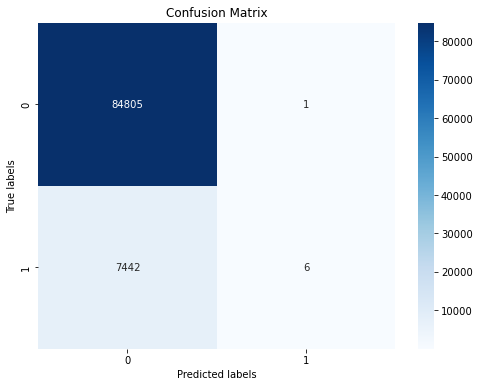

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


Random Forest ROC AUC: 0.6575400344130344


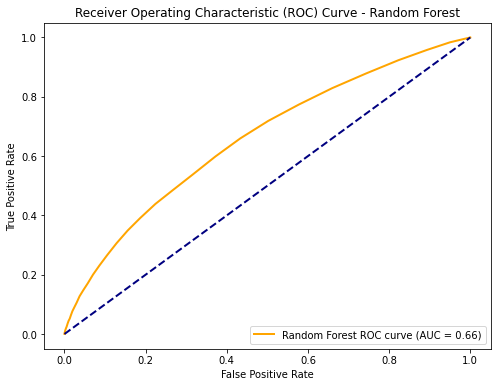

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predicting probabilities 
y_pred_proba_rf = rf_classifier.predict_proba(X_test_imputed_df)[:, 1]

# Computing ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("Random Forest ROC AUC:", roc_auc_rf)

# Ploting ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

## LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Calling the logistic regression model.
# Assume the max_iter value as 1000.
logreg = LogisticRegression(max_iter=1000)  

# Training the model
logreg.fit(X_train_imputed_df, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test_imputed_df)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9190495805059943
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.08      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.50      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



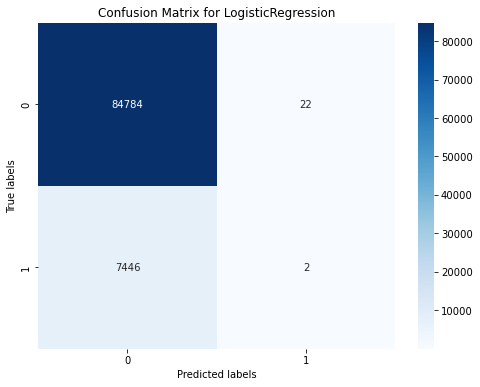

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for LogisticRegression")
plt.show()

Logistic Regression ROC AUC: 0.618507599438491


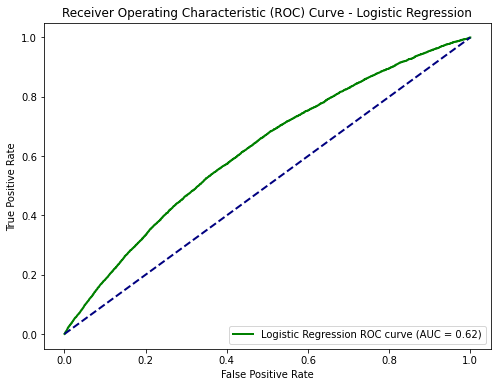

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predicting probabilities 
y_pred_proba_logreg = logreg.predict_proba(X_test_imputed_df)[:, 1]

# Computing ROC AUC score
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
print("Logistic Regression ROC AUC:", roc_auc_logreg)

# Ploting ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Training the model
gb_classifier.fit(X_train_imputed_df, y_train)

# Predicting on the test set
y_pred_gb = gb_classifier.predict(X_test_imputed_df)

# Calculating accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

# Generating the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Accuracy: 0.9193097318273462
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.64      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.78      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



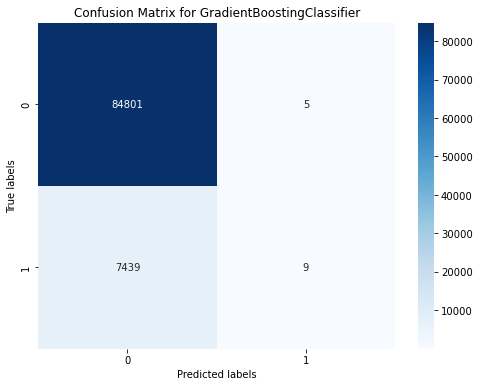

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for GradientBoostingClassifier")
plt.show()

Gradient Boosting ROC AUC: 0.6978641724856173


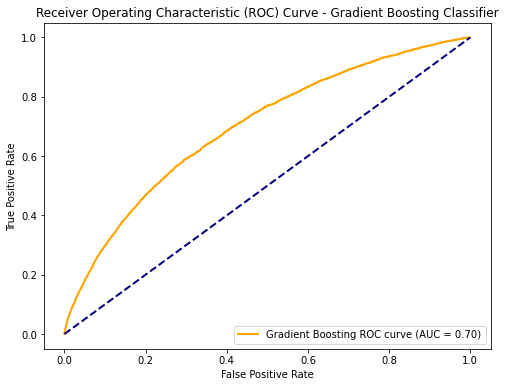

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predicting probabilities 
y_pred_proba_gb = gb_classifier.predict_proba(X_test_imputed_df)[:, 1]

# Computing ROC AUC score
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print("Gradient Boosting ROC AUC:", roc_auc_gb)

# Ploting ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label='Gradient Boosting ROC curve (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()


## Xboost Algorithm Sagemaker

In [67]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.inputs import TrainingInput
from sagemaker.estimator import Estimator

In [68]:
# Define IAM role
role = get_execution_role()

# Specify bucket and prefix for storing training data and model artifacts
bucket = 'sagemaker-us-east-1-339713065136'
prefix = 'sagemaker/xgboost_classification'

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [69]:
from sagemaker import image_uris
from sagemaker.estimator import Estimator
import boto3

# Get the current AWS region
session = boto3.Session()
region = session.region_name

# Specify the XGBoost version
xgboost_version = "1.3-1"

# Create an instance of the XGBoost estimator with the specified version
xgb_estimator = Estimator(image_uri=image_uris.retrieve("xgboost", region, version=xgboost_version),
                           role=role,
                           instance_count=1,
                           instance_type='ml.m4.xlarge',
                           output_path=f's3://{bucket}/{prefix}/output')


INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [70]:
# Set hyperparameters for XGBoost model
hyperparameters = {
    'max_depth': '5',
    'eta': '0.1',
    'gamma': '1',
    'min_child_weight': '1',
    'subsample': '0.8',
    'objective': 'binary:logistic',
    'num_round': '100'
}
xgb_estimator.set_hyperparameters(**hyperparameters)

In [71]:
# Specify the data location in S3
train_input = TrainingInput(s3_data=f's3://sagemaker-us-east-1-339713065136/team-project/X_train/X_train_df.csv', content_type='csv')

In [72]:
# Train the XGBoost model
xgb_estimator.fit({'train': train_input})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-03-30-20-42-29-110


2024-03-30 20:42:29 Starting - Starting the training job...
2024-03-30 20:42:53 Starting - Preparing the instances for training......
2024-03-30 20:43:37 Downloading - Downloading input data...
2024-03-30 20:44:07 Downloading - Downloading the training image...
2024-03-30 20:44:48 Training - Training image download completed. Training in progress...[2024-03-30 20:45:03.434 ip-10-2-160-31.ec2.internal:8 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-03-30 20:45:03.473 ip-10-2-160-31.ec2.internal:8 INFO profiler_config_parser.py:111] User has disabled profiler.
[2024-03-30:20:45:03:INFO] Imported framework sagemaker_xgboost_container.training
[2024-03-30:20:45:03:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2024-03-30:20:45:03:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-30:20:45:03:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-03-30:20:45:03:INFO] Determined delimiter of CSV input is ','

UnexpectedStatusException: Error for Training job sagemaker-xgboost-2024-03-30-20-42-29-110: Failed. Reason: AlgorithmError: framework error: 
Traceback (most recent call last):
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_xgboost_container/algorithm_mode/train.py", line 239, in train_job
    feval=configured_feval, callbacks=callbacks, xgb_model=xgb_model, verbose_eval=False)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/training.py", line 235, in train
    early_stopping_rounds=early_stopping_rounds)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrain, i, obj)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/core.py", line 1282, in update
    dtrain.handle))
  File "/miniconda3/lib/python3.7/site-packages/xgboost/core.py", line 189, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [20:45:03] ../src/objective/regression_obj.cu:102: label must be in [0,1] for logistic regression
Stack trace:
  [bt] (0) /miniconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x8

In [64]:
import numpy as np

# Check the unique values in y_train
unique_values = np.unique(y_train)
print("Unique values in y_train:", unique_values)

# If there are any values other than 0 and 1, correct them
if not set(unique_values).issubset({0, 1}):
    # Assuming any value greater than 0 is set to 1, and all other values to 0
    y_train = np.where(y_train > 0, 1, 0)

# Check the unique values again to ensure they are now 0 and 1
unique_values_corrected = np.unique(y_train)
print("Unique values in corrected y_train:", unique_values_corrected)


Unique values in y_train: [0 1]
Unique values in corrected y_train: [0 1]


In [73]:
import numpy as np

# Assuming y_train is a numpy array or pandas Series containing the labels
unique_labels = np.unique(y_train)
print("Unique values in y_train:", unique_labels)

# Check if the unique values contain only 0 and 1
if set(unique_labels) == {0, 1}:
    print("Labels are properly encoded as 0 and 1 for binary classification.")
else:
    print("Labels are not properly encoded for binary classification.")


Unique values in y_train: [0 1]
Labels are properly encoded as 0 and 1 for binary classification.


In [74]:
import numpy as np

# Assuming y_train is a numpy array or pandas Series containing the labels
label_distribution = np.bincount(y_train)
num_classes = len(label_distribution)

# Print label distribution
print("Label Distribution:")
for label, count in enumerate(label_distribution):
    print(f"Label {label}: {count} occurrences")

# Check if the labels fall within the range of [0, 1]
if num_classes == 2 and set(y_train) == {0, 1}:
    print("Labels are binary and fall within the range of [0, 1].")
else:
    print("Labels are not binary or do not fall within the range of [0, 1]. Preprocessing may be required.")


Label Distribution:
Label 0: 197880 occurrences
Label 1: 17377 occurrences
Labels are binary and fall within the range of [0, 1].


In [76]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.inputs import TrainingInput
from sagemaker.image_uris import retrieve

# Define IAM role
role = get_execution_role()

# Specify bucket and prefix for storing training data and model artifacts
bucket = 'sagemaker-us-east-1-339713065136'
prefix = 'sagemaker-us-east-1-339713065136/team-project'

# Create an instance of the XGBoost estimator
container = retrieve(region=sagemaker.Session().boto_region_name, framework='xgboost', version='1.3-1')
xgb_estimator = sagemaker.estimator.Estimator(container,
                                              role,
                                              instance_count=1,
                                              instance_type='ml.m4.xlarge',
                                              output_path=f's3://{bucket}/{prefix}/output')

# Set hyperparameters for XGBoost model
hyperparameters = {
    'max_depth': '5',
    'eta': '0.1',
    'gamma': '1',
    'min_child_weight': '1',
    'subsample': '0.8',
    'objective': 'binary:logistic',
    'num_round': '100'
}
xgb_estimator.set_hyperparameters(**hyperparameters)

# Specify the data location in S3
train_input = TrainingInput(s3_data=f's3://sagemaker-us-east-1-339713065136/team-project/X_train/X_train_df.csv', content_type='csv')

# Train the XGBoost model
xgb_estimator.fit({'train': train_input})


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-03-30-20-55-01-458


2024-03-30 20:55:01 Starting - Starting the training job...
2024-03-30 20:55:16 Starting - Preparing the instances for training...
2024-03-30 20:55:59 Downloading - Downloading input data......
2024-03-30 20:56:34 Downloading - Downloading the training image...
2024-03-30 20:57:15 Training - Training image download completed. Training in progress..[2024-03-30 20:57:28.548 ip-10-2-70-231.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-03-30 20:57:28.579 ip-10-2-70-231.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2024-03-30:20:57:28:INFO] Imported framework sagemaker_xgboost_container.training
[2024-03-30:20:57:28:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2024-03-30:20:57:28:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-30:20:57:28:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-03-30:20:57:28:INFO] Determined delimiter of CSV input is ','


UnexpectedStatusException: Error for Training job sagemaker-xgboost-2024-03-30-20-55-01-458: Failed. Reason: AlgorithmError: framework error: 
Traceback (most recent call last):
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_xgboost_container/algorithm_mode/train.py", line 239, in train_job
    feval=configured_feval, callbacks=callbacks, xgb_model=xgb_model, verbose_eval=False)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/training.py", line 235, in train
    early_stopping_rounds=early_stopping_rounds)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrain, i, obj)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/core.py", line 1282, in update
    dtrain.handle))
  File "/miniconda3/lib/python3.7/site-packages/xgboost/core.py", line 189, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [20:57:29] ../src/objective/regression_obj.cu:102: label must be in [0,1] for logistic regression
Stack trace:
  [bt] (0) /miniconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x8

## XGBOOST ALGORITHM

In [67]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [68]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Defining the XGBoost model
# Setting up Hyperparameters manually.
model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42
)

# Training the model
model.fit(X_train_imputed_df, y_train)

# predicting the target values
y_pred_xg = model.predict(X_test_imputed_df)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy)

# Generating the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xg))


Accuracy: 0.9193205714657359
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.63      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.78      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



## XGBOOST MODEL WITH ADJUSTED HYPERPARAMETERES

In [85]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Defining the XGBoost model
# Adjsuting Hyperparameters manually.
# We increased min_child_weight to help avoid overfitting to minority class.
# We slighlty decreased subsample and colsample_bytree to reduce overfitting to the majority class.
# We lowered learning rate and increased the number of estimators to enhance model learning.
# We introduced gamma to improve the performance.
model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.05,  
    n_estimators=200,    
    objective='binary:logistic',
    subsample=0.7,       
    colsample_bytree=0.7,  
    min_child_weight=5,  
    gamma=0.1,            #
    seed=42
)

# Training the model
model.fit(X_train_imputed_df, y_train)

# predicting the target values
y_pred_xg1 = model.predict(X_test_imputed_df)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred_xg1)
print("Accuracy:", accuracy)

# Generating the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xg1))


Accuracy: 0.9193422507425152
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.71      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.81      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



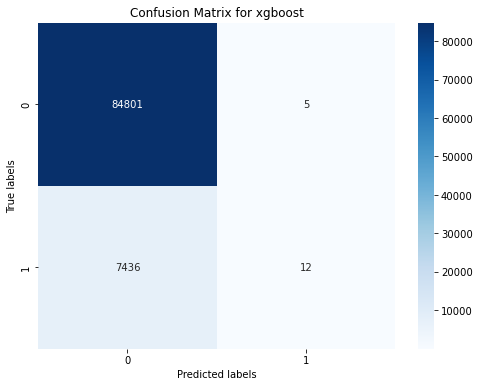

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xg1)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for xgboost")
plt.show()

XGBoost ROC AUC: 0.7069312154805434


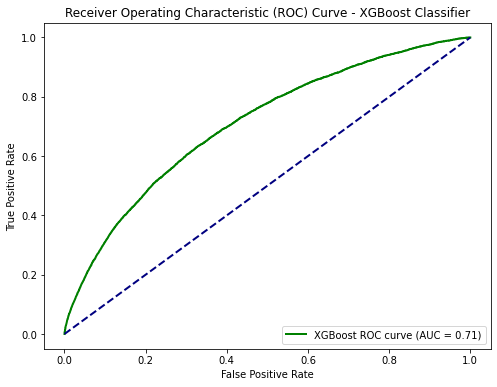

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predicting probabilities 
y_pred_proba_xg = model.predict_proba(X_test_imputed_df)[:, 1]

# Computing ROC AUC score
roc_auc_xg = roc_auc_score(y_test, y_pred_proba_xg)
print("XGBoost ROC AUC:", roc_auc_xg)

# Ploting ROC curve
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_pred_proba_xg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xg, tpr_xg, color='green', lw=2, label='XGBoost ROC curve (AUC = %0.2f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()


## ROC AUC DIAGRAMS COMPARISION OF ALL MODELS:

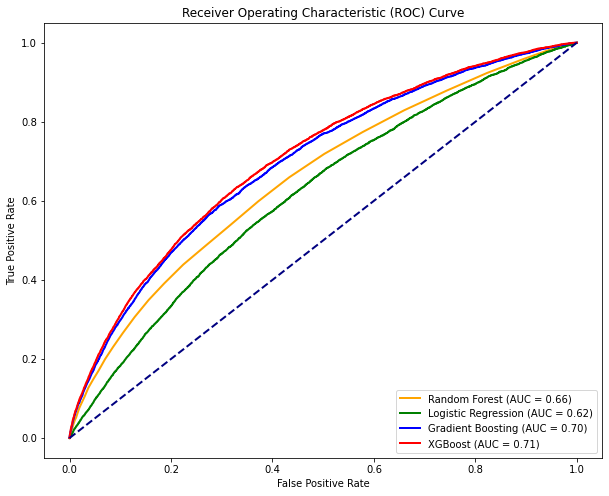

In [89]:
plt.figure(figsize=(10, 8))

# From Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# From Logistic Regression ROC curve
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)

# From Gradient Boosting ROC curve
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)

# From XGBoost ROC curve
plt.plot(fpr_xg, tpr_xg, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xg)

# From the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()
